# Sesión 05: Escalamiento multidimensional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El escalamiento multidimensional (EMD) es un conjunto de procedimientos para hacer una representación espacial de la similitud o disimilitud de datos. En esta técnica se toma una matriz de distancias (o disimilitudes) entre un conjunto de objetos y los coloca en un espacio de menor dimensión. Para este ejemplo utilizaremos una matriz de correlaciones.

In [2]:
from sklearn.manifold import MDS

In [3]:
df = pd.read_excel('https://github.com/adan-rs/AnalisisDatos/raw/main/s04_estadistica_descriptiva/data/b02_enigh2020.xlsx')

In [4]:
var_cont = ["ing_cor", "gasto_mon", "edad_jefe", "tot_integ"]
matriz_corr = df[var_cont].corr()
matriz_corr

,ing_cor,gasto_mon,edad_jefe,tot_integ
ing_cor,1.000000,0.618385,0.031953,0.135281
gasto_mon,0.618385,1.000000,-0.054339,0.168204
edad_jefe,0.031953,-0.054339,1.000000,-0.158874
tot_integ,0.135281,0.168204,-0.158874,1.000000


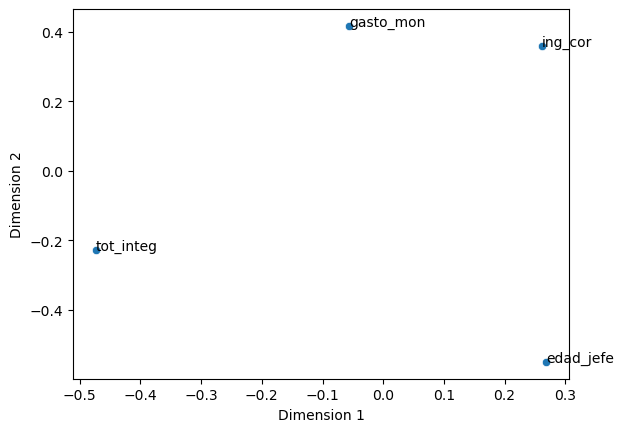

In [5]:
# Calcular distancias
distancias = 1-np.abs(matriz_corr)
# Aplicar modelo
mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto')
mds_resultados = mds.fit_transform(distancias)
# Convertir resultados a dataframe
mds_df = pd.DataFrame(mds_resultados, columns=['Dimension 1', 'Dimension 2'])
mds_df['Etiqueta']=var_cont
#Visualización
sns.scatterplot(data=mds_df, x='Dimension 1', y='Dimension 2')
# Agregar etiquetas a cada punto
for i in range(len(mds_df)):
    plt.text(mds_df['Dimension 1'][i], mds_df['Dimension 2'][i], mds_df['Etiqueta'][i])
plt.show()

In [ ]:
#!pip install yfinance